In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.ToTensor()

trainset = torchvision.datasets.MNIST(
    root='./data',
    train=False, 
    download=True,
    transform=transform
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



10000
torch.Size([1, 28, 28]) 7


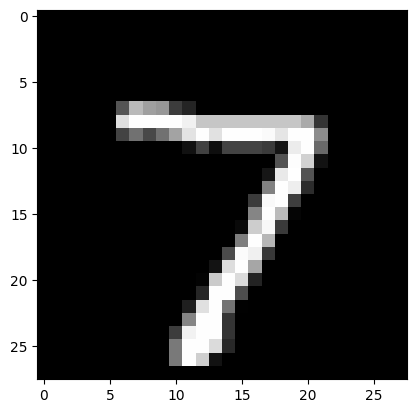

In [3]:
from matplotlib import pyplot as plt


print(len(trainset))
print(trainset[0][0].shape, trainset[0][1])
plt.imshow(trainset[0][0][0], cmap='gray')

In [4]:
from torch.utils.data import Subset
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms

# 데이터셋 크기 확인
dataset_size = len(trainset) 

batch_size = 64
# 훈련과 검증 인덱스 설정 (전체 크기 내에서 설정)
split_point = int(0.8 * dataset_size)  # 80%를 훈련용, 20%를 검증용으로 나눔
train_indices = list(range(split_point))  # 0부터 split_point-1까지
test_indices = list(range(split_point, dataset_size))  # split_point부터 끝까지

# Subset을 사용하여 훈련 및 검증 데이터셋 나누기
train_dataset = Subset(trainset, train_indices)
test_dataset = Subset(trainset, test_indices)

# DataLoader로 배치 처리
trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [5]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images.shape, labels.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64])


In [6]:
import torch
import torch.nn as nn
from torch.optim import SGD

# Model 클래스 정의
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # 입력층 -> 은닉층
        self.fc2 = nn.Linear(hidden_size, output_size)  # 은닉층 -> 출력층
    
    def forward(self, x):
        x = x.view(x.size(0), -1)  # 28x28 이미지 -> 1차원 벡터로 변환
        x = self.fc1(x)  # 첫 번째 레이어 적용
        x = torch.relu(x)  # ReLU 활성화 함수
        x = self.fc2(x)  # 두 번째 레이어 적용
        return x

# 모델 초기화
input_size = 28 * 28  # MNIST 이미지 크기
hidden_size = 1024  # 은닉층 크기
output_size = 10  # MNIST 클래스 수

model = Model(input_size, hidden_size, output_size)

# 손실 함수 및 옵티마이저 정의

criterion = nn.CrossEntropyLoss()  # Cross-Entropy 손실 함수
optimizer = SGD(model.parameters(), lr=0.01)  # SGD 옵티마이저

# 학습 데이터 및 라벨 예시 (임의로 생성된 데이터)
data = torch.randn(64, 1, 28, 28)  # 배치 크기 64, 28x28 이미지
target = torch.randint(0, 10, (64,))  # 0~9 사이의 정수로 된 라벨 (64개의 샘플)

# 학습 과정
num_epochs = 100  # 학습 반복 횟수

for epoch in range(num_epochs):
    # Forward 패스: 모델 출력 계산
    output = model(data)
    
    # 손실 계산
    loss = criterion(output, target)
    
    # 모델 학습 과정
    optimizer.zero_grad()  # 기존의 그라디언트를 초기화
    loss.backward()  # 손실 함수에 대한 그라디언트 계산
    optimizer.step()  # 모델 매개변수 업데이트
    
    # 예측 정확도 계산
    _, predicted = torch.max(output, 1)  # 가장 높은 값의 인덱스를 예측 값으로 선택
    correct = (predicted == target).sum().item()  # 맞춘 개수
    accuracy = correct / target.size(0)  # 정확도 계산
    
    # 에포크마다 손실과 정확도 출력
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy * 100:.2f}%')


Epoch [1/100], Loss: 2.3265, Accuracy: 7.81%
Epoch [2/100], Loss: 2.2856, Accuracy: 10.94%
Epoch [3/100], Loss: 2.2458, Accuracy: 15.62%
Epoch [4/100], Loss: 2.2068, Accuracy: 20.31%
Epoch [5/100], Loss: 2.1687, Accuracy: 28.12%
Epoch [6/100], Loss: 2.1314, Accuracy: 34.38%
Epoch [7/100], Loss: 2.0949, Accuracy: 40.62%
Epoch [8/100], Loss: 2.0590, Accuracy: 43.75%
Epoch [9/100], Loss: 2.0237, Accuracy: 50.00%
Epoch [10/100], Loss: 1.9890, Accuracy: 59.38%
Epoch [11/100], Loss: 1.9549, Accuracy: 60.94%
Epoch [12/100], Loss: 1.9213, Accuracy: 68.75%
Epoch [13/100], Loss: 1.8882, Accuracy: 75.00%
Epoch [14/100], Loss: 1.8557, Accuracy: 81.25%
Epoch [15/100], Loss: 1.8236, Accuracy: 81.25%
Epoch [16/100], Loss: 1.7919, Accuracy: 84.38%
Epoch [17/100], Loss: 1.7607, Accuracy: 87.50%
Epoch [18/100], Loss: 1.7299, Accuracy: 89.06%
Epoch [19/100], Loss: 1.6995, Accuracy: 92.19%
Epoch [20/100], Loss: 1.6695, Accuracy: 92.19%
Epoch [21/100], Loss: 1.6399, Accuracy: 92.19%
Epoch [22/100], Loss: 1

In [7]:
import torch
import torch.nn as nn
from torch.optim import SGD

# Model 클래스 정의
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # 입력층 -> 은닉층
        self.fc2 = nn.Linear(hidden_size, output_size)  # 은닉층 -> 출력층
    
    def forward(self, x):
        x = x.view(x.size(0), -1)  # 28x28 이미지 -> 1차원 벡터로 변환
        x = self.fc1(x)  # 첫 번째 레이어 적용
        x = torch.relu(x)  # ReLU 활성화 함수
        x = self.fc2(x)  # 두 번째 레이어 적용
        return x

# 모델 초기화
input_size = 28 * 28  # MNIST 이미지 크기
hidden_size = 1024  # 은닉층 크기
output_size = 10  # MNIST 클래스 수

model = Model(input_size, hidden_size, output_size)

In [8]:
from torch.optim import SGD
# 옵티마이저 설정
lr = 0.001
criterion = nn.CrossEntropyLoss() 

optimizer = SGD(model.parameters(), lr=lr)

In [9]:

train_accuracies = []
test_accuracies = []

In [10]:
def accuracy(model, dataloader):
    correct = 0
    total = 0
    model.eval()  # 평가 모드로 설정
    
    with torch.no_grad():  # 추론 시에는 기울기 계산을 하지 않음
        for data in dataloader:
            inputs, labels = data
            inputs, labels = inputs.to('cpu'), labels.to('cpu')

            outputs = model(inputs)
            
            # outputs에서 가장 높은 값을 가진 클래스 선택
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct / total  # 정확도 반환

In [11]:
n_epochs = 100
for epoch in range(n_epochs):
    model.train()  # 학습 모드로 설정
    
    total_loss = 0.
    
    for data in trainloader:
        optimizer.zero_grad()

        inputs, labels = data
        inputs, labels = inputs.to('cpu'), labels.to('cpu')

        # Forward pass
        preds = model(inputs)

        # Cross-Entropy 또는 MSE 손실 함수 사용
        loss = criterion(preds, labels)

        # Backward pass 및 매개변수 업데이트
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    
    # 정확도 계산
    train_acc = accuracy(model, trainloader)
    test_acc = accuracy(model, testloader)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"Epoch {epoch:3d} | Loss: {total_loss:.4f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")



Epoch   0 | Loss: 286.4593 | Train Acc: 0.1870 | Test Acc: 0.1980
Epoch   1 | Loss: 281.5057 | Train Acc: 0.2934 | Test Acc: 0.3100
Epoch   2 | Loss: 276.6679 | Train Acc: 0.4293 | Test Acc: 0.4285
Epoch   3 | Loss: 271.8606 | Train Acc: 0.5353 | Test Acc: 0.5345
Epoch   4 | Loss: 267.0199 | Train Acc: 0.6056 | Test Acc: 0.6065
Epoch   5 | Loss: 262.1021 | Train Acc: 0.6489 | Test Acc: 0.6545
Epoch   6 | Loss: 257.0732 | Train Acc: 0.6791 | Test Acc: 0.6900
Epoch   7 | Loss: 251.9114 | Train Acc: 0.6954 | Test Acc: 0.7140
Epoch   8 | Loss: 246.5973 | Train Acc: 0.7114 | Test Acc: 0.7375
Epoch   9 | Loss: 241.1319 | Train Acc: 0.7228 | Test Acc: 0.7515
Epoch  10 | Loss: 235.5184 | Train Acc: 0.7309 | Test Acc: 0.7630
Epoch  11 | Loss: 229.7701 | Train Acc: 0.7370 | Test Acc: 0.7690
Epoch  12 | Loss: 223.9070 | Train Acc: 0.7426 | Test Acc: 0.7785
Epoch  13 | Loss: 217.9522 | Train Acc: 0.7451 | Test Acc: 0.7845
Epoch  14 | Loss: 211.9423 | Train Acc: 0.7499 | Test Acc: 0.7930
Epoch  15 

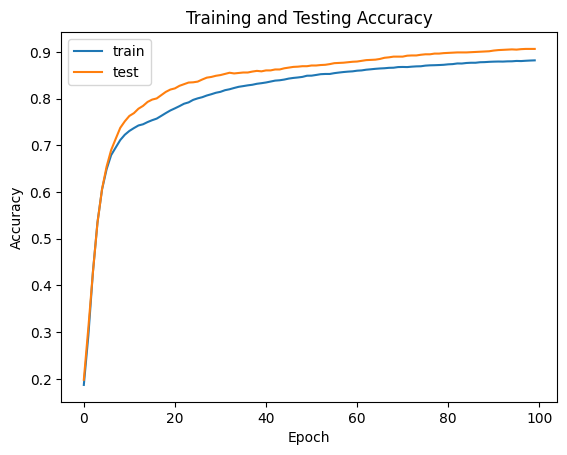

In [12]:
import numpy as np
import matplotlib.pyplot as plt  # matplotlib.pyplot 임포트 추가

def plot_acc(train_accs, test_accs, label1='train', label2='test'):
    x = np.arange(len(train_accs))

    plt.plot(x, train_accs, label=label1)
    plt.plot(x, test_accs, label=label2)
    plt.xlabel('Epoch')  # x축 레이블 추가
    plt.ylabel('Accuracy')  # y축 레이블 추가
    plt.title('Training and Testing Accuracy')  # 제목 추가
    plt.legend()
    plt.show()

# plot_acc 함수 호출
plot_acc(train_accuracies, test_accuracies)